# Modelo normal

1. - Importar librerias

In [1]:
import os
import cv2
import numpy as np
from numpy import save
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from numpy import load
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

2. - Categroias

In [2]:
# Escoger las categorías requeridas.
# Tenemos las opciones: 'Irregullar', 'Spiral','Elliptical', 'Lenticular','Peculiar'
categories = ['Irregullar', 'Spiral','Elliptical', 'Lenticular','Peculiar']

3. - Escalar las imagenes para entrenamiento y almacenar junto con las etiquetas en un arreglo de numpy 

In [3]:
# Indicar la ubicación de la DB
lw = 150
db_path = '/home/donaldo3500/Documents/1_TEC/8.OctavoSemestre/2.FisicaComputacional2/Proyectos/FinalProject/ComputationalPhysics-Final/galaxies_new_labels/'


# Inicialización de la lista para guardar los datos de entrenamiento
training_data = []


# Función para creación de datos de entrenamiento
def create_training_data():
    for category in categories:
        #Inspección de las categorías
        path = os.path.join(db_path, category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            # Editar tamaño de las imágenes

            try:
                img_size = lw
                img_array = cv2.imread(os.path.join(path, img),cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (img_size, img_size))
                training_data.append([new_array,class_num])

            except Exception as e:

                pass


create_training_data()

# Guardar etiquetas e imágenes
x = []
y = []
for features, label in training_data:
    x.append(features)
    y.append(label)

img_size = lw
x = np.array(x).reshape(-1, img_size, img_size)
y = np.array(y)

x = x/255 # Normalización

#Pruebas de tamaño
print(x.shape)
print(y.shape)
print(y)
print(len(y))

# Guardado de las variables de entrenamiento
# Formato: Numpy Array
save('x.npy', x)
save('y.npy', y)

(3456, 150, 150)
(3456,)
[0 0 0 ... 4 4 4]
3456


4. - Entrenar la NNET y almacenar los valores de accuracy  y loss en un archivo pandas. 

In [4]:
# Control de la versión de TensorFlow
print(tf.__version__)

lw = 150


# Carga de los Numpy Arrays previamente generados 
x = load('x.npy')
y = load('y.npy')

print(len(x))




# Definición del modelo
# Usando librería KERAS
# Definición de la función de activación en activation=''
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(lw, lw)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

# Definición del optimizador
# Activación del loss
# Accuracy como métrica
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Establecimiento del directorio para los checkpoints
checkpoint_path = "Checkpoints/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)


cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

# Realizar el entrenamiento e imprimirlo
nep = 50 # Definición del número de steps
history = model.fit(x, y, epochs=nep)
print(history)

# Guardado del modelo obtenido
model.save('Galaxy_class.model')

# Revisión del loss y accuracy para conocer desempeño
# Guardado en DataFrame
vec = np.linspace(0, nep, 1000)
acc = history.history['accuracy']
loss = history.history['loss']
df = pd.DataFrame(list(zip(acc, loss)), columns=['Accuracy','Loss'])
df.to_csv('/home/donaldo3500/Documents/1_TEC/8.OctavoSemestre/2.FisicaComputacional2/Proyectos/FinalProject/ComputationalPhysics-Final/Code/acc_loss_df.csv')
print(df)

2.5.0
3456
Epoch 1/50
108/108 [==============================] - 1s 9ms/step - loss: 2.5794 - accuracy: 0.2425
Epoch 2/50
108/108 [==============================] - 1s 9ms/step - loss: 1.7858 - accuracy: 0.3455
Epoch 3/50
108/108 [==============================] - 1s 9ms/step - loss: 1.7220 - accuracy: 0.3788
Epoch 4/50
108/108 [==============================] - 1s 9ms/step - loss: 1.5439 - accuracy: 0.4320
Epoch 5/50
108/108 [==============================] - 1s 9ms/step - loss: 1.3751 - accuracy: 0.4867
Epoch 6/50
108/108 [==============================] - 1s 10ms/step - loss: 1.3060 - accuracy: 0.5234
Epoch 7/50
108/108 [==============================] - 1s 9ms/step - loss: 1.2111 - accuracy: 0.5657
Epoch 8/50
108/108 [==============================] - 1s 9ms/step - loss: 1.1783 - accuracy: 0.5697
Epoch 9/50
108/108 [==============================] - 1s 10ms/step - loss: 1.1569 - accuracy: 0.5900
Epoch 10/50
108/108 [==============================] - 1s 9ms/step - loss: 1.1292 - acc

5. - Escalar las imagenes para pruebas y almacenar junto con las etiquetas en un arreglo de numpy 

In [5]:
db_path = '/home/donaldo3500/Documents/1_TEC/8.OctavoSemestre/2.FisicaComputacional2/Proyectos/FinalProject/ComputationalPhysics-Final/Test_db/'

# Inicialización de la variable para guardar los datos de testeo
training_data=[]

# Definición de las imágenes que servirán para hacer el testeo
# Se convierten las imágenes a escala de grises
def create_training_data():
    for category in categories:
        path = os.path.join(db_path, category)
        class_num = categories.index(category)
        for img in os.listdir(path):

            try:
                img_size = 150
                img_array = cv2.imread(os.path.join(path, img),cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (img_size, img_size))
                training_data.append([new_array,class_num])

            except Exception as e:

                pass

create_training_data()


# Se guardan las imágenes y las etiquetas en los arreglos
x = []
y = []
for features, label in training_data:
    x.append(features)
    y.append(label)


img_size = 150
x = np.array(x).reshape(-1, img_size, img_size)
print(len(x))
print(len(y))

# Guardado de los arreglos
save('x_test.npy', x)
save('y_test.npy', y)

87
87


6. - Hacer las pruebas del modelo (Para navegar en las 106 imagenes modificar "ls" de 0 a 91)

3/3 [==============================] - 0s 2ms/step - loss: 0.7823 - accuracy: 0.7471

Test accuracy: 74.71264600753784 %
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 10)                2881418   
_________________________________________________________________
softmax (Softmax)            (None, 10)                0         
Total params: 2,881,418
Trainable params: 2,881,418
Non-trainable params: 0
_________________________________________________________________


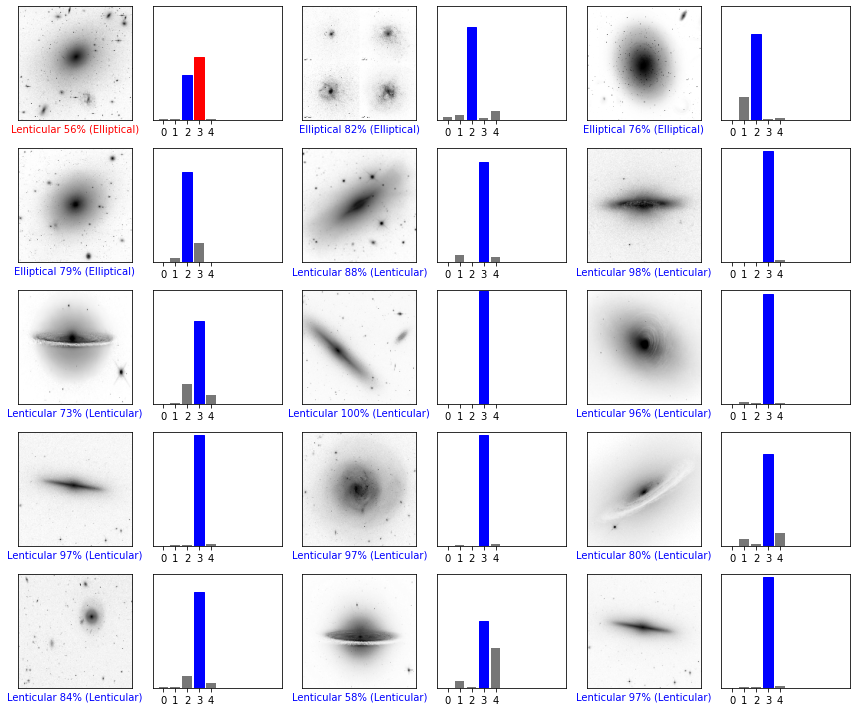

In [6]:
# Cargamos las variables antes generadas
X = load('x_test.npy')/255
Y = load('y_test.npy')

# Carga del modelo
model = tf.keras.models.load_model('Galaxy_class.model')

# Evaluación del modelo
test_loss, test_acc = model.evaluate(X,  Y)

print('\nTest accuracy:', test_acc*100, '%')

# Llamado de las probabilidades en la clasificación
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

probability_model.summary()

predictions = probability_model.predict(X)

# Función para mostrar las imágenes con la probabilidad para cada categoría 
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(categories[predicted_label],
                                100*np.max(predictions_array),
                                categories[true_label]),
                                color=color)

# Función para mostrar el arreglo de imágenes
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(5))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')



num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))


# Llamado de las funciones anteriores
# Muestra de los recultados del test al modelo
ls = 43
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i+ls, predictions[i+ls], Y, X)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i+ls, predictions[i+ls], Y)
plt.tight_layout()
plt.show()



7. - Análisis del modelo 

In [7]:
nep = 50

# Llamamos los resultados del entrenamiento del modelo
# Accuracy y Loss
data = pd.read_csv('acc_loss_df.csv')
acc = data['Accuracy']
loss = data['Loss']

# Graficamos los recultados del Accuracy y Loss
# Durante el proceso de entrenamiento

vec = np.linspace(0, nep, nep)

fig = go.Figure()

fig.add_trace(go.Scatter(x = vec,y = acc, name='accuracy'))
fig.add_trace(go.Scatter(x = vec,y = loss, name='loss'))


high_annotations = [dict(x=vec,
                         y=acc,
                         xref="x", yref="y",
                         ax=0, ay=-40)]
low_annotations = [dict(x=vec,
                        y=loss,
                        xref="x", yref="y",
                        ax=0, ay=40)]




fig.update_layout(title='Model analysis',
                   xaxis_title='Epoch',
                   yaxis_title='Loss/Accuracy', font_size=14, width = 1000, height = 600)

fig.show()

/home/donaldo3500/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



(<Figure size 576x576 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

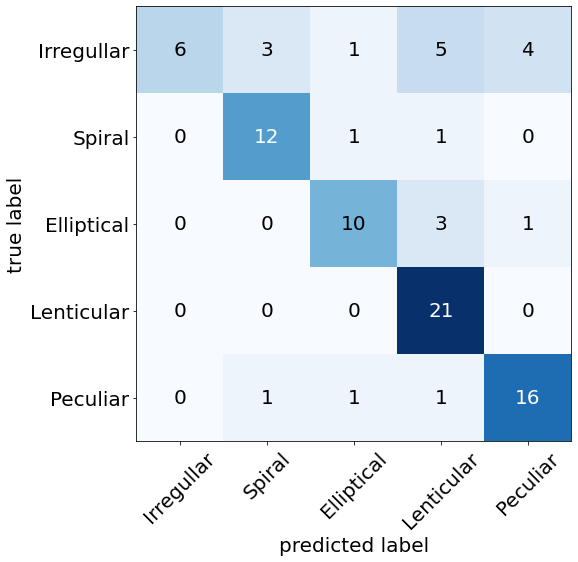

In [8]:
ypred = model.predict_classes(X)

# Conformación de la matriz de confusión
mat = confusion_matrix(Y, ypred)
plt.rcParams.update({'font.size': 20})

# Mostrar la matriz de confusión
plot_confusion_matrix(conf_mat=mat, class_names = categories, figsize = (8,8))


UsageError: Line magic function `%tensorboard` not found.
